In [2]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
base_url = "https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&start={}"

# Define the number of pages to scrape (2 pages in this case)
num_pages = 2

# Loop through the pages
title=[]
release_year=[]
Run_Time=[]
movie_genre=[]
movie_rating=[]
number_votes = []
us_gross = []

for page in range(num_pages):
    # Create the URL for the current page
    page_url = base_url.format(page * 50) 
    r = requests.get(page_url)
    soup=BeautifulSoup(r.text,"lxml")
    box=soup.find("div",class_="lister-list")
    titles=box.find_all("h3")
    
    for i in titles:
        name=i.a.text
        title.append(name)
    released_year=box.find_all("span",class_="lister-item-year text-muted unbold")
    
    for i in released_year:
        name=i.text
        release_year.append(name)
    Running_Time=box.find_all("span",class_="runtime")
    
    for i in Running_Time:
        name=i.text
        Run_Time.append(name)
    genre=box.find_all("span",class_="genre")
    
    for i in genre:
        name=i.text.strip()
        movie_genre.append(name)
    rating=box.find_all("div",class_="ratings-bar")
    
    for i in rating:
        name=i.strong.text
        movie_rating.append(name)


    movie_div =soup.find_all('div', class_='lister-item mode-advanced')
    for container in movie_div:
    # There are two NV containers, grab both of them as they hold both the votes and the grosses
        nv = container.find_all('span', attrs={'name': 'nv'})

        # filter nv for votes
        vote = nv[0].text
        number_votes.append(vote)

        # filter nv for gross
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)
    
    

    
movies = pd.DataFrame({'movie_name': title,'movie_year': release_year,'movie_runtime': Run_Time,'movie_gnere': movie_genre,'imdb_ratings': movie_rating,

'number_votes': number_votes,
'us_gross_millions': us_gross,
})

In [4]:
movies

,movie_name,movie_year,movie_runtime,movie_gnere,imdb_ratings,number_votes,us_gross_millions
0,The Shawshank Redemption,(1994),142 min,Drama,9.3,"2,804,977",$28.34M
1,The Godfather,(1972),175 min,"Crime, Drama",9.2,"1,954,548",$134.97M
2,The Dark Knight,(2008),152 min,"Action, Crime, Drama",9.0,"2,786,674",$534.86M
3,Schindler's List,(1993),195 min,"Biography, Drama, History",9.0,"1,410,143",$96.90M
4,The Lord of the Rings: The Return of the King,(2003),201 min,"Action, Adventure, Drama",9.0,"1,920,256",$377.85M
...,...,...,...,...,...,...,...
95,Toy Story 3,(2010),103 min,"Animation, Adventure, Comedy",8.3,"870,999",$415.00M
96,Citizen Kane,(1941),119 min,"Drama, Mystery",8.3,"456,896",$1.59M
97,Lawrence of Arabia,(1962),218 min,"Adventure, Biography, Drama",8.3,"306,148",$44.82M
98,Singin' in the Rain,(1952),103 min,"Comedy, Musical, Romance",8.3,"253,680",$8.82M


In [5]:
movies.head()

,movie_name,movie_year,movie_runtime,movie_gnere,imdb_ratings,number_votes,us_gross_millions
0,The Shawshank Redemption,(1994),142 min,Drama,9.3,"2,804,977",$28.34M
1,The Godfather,(1972),175 min,"Crime, Drama",9.2,"1,954,548",$134.97M
2,The Dark Knight,(2008),152 min,"Action, Crime, Drama",9.0,"2,786,674",$534.86M
3,Schindler's List,(1993),195 min,"Biography, Drama, History",9.0,"1,410,143",$96.90M
4,The Lord of the Rings: The Return of the King,(2003),201 min,"Action, Adventure, Drama",9.0,"1,920,256",$377.85M


In [6]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_name         100 non-null    object
 1   movie_year         100 non-null    object
 2   movie_runtime      100 non-null    object
 3   movie_gnere        100 non-null    object
 4   imdb_ratings       100 non-null    object
 5   number_votes       100 non-null    object
 6   us_gross_millions  100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [7]:
movies['imdb_ratings']=movies['imdb_ratings'].astype(float)

movies['movie_year'] = movies['movie_year'].str.extract('(\d+)').astype(int)





In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_name         100 non-null    object 
 1   movie_year         100 non-null    int32  
 2   movie_runtime      100 non-null    object 
 3   movie_gnere        100 non-null    object 
 4   imdb_ratings       100 non-null    float64
 5   number_votes       100 non-null    object 
 6   us_gross_millions  100 non-null    object 
dtypes: float64(1), int32(1), object(5)
memory usage: 5.2+ KB


In [9]:
movies.head()

,movie_name,movie_year,movie_runtime,movie_gnere,imdb_ratings,number_votes,us_gross_millions
0,The Shawshank Redemption,1994,142 min,Drama,9.3,"2,804,977",$28.34M
1,The Godfather,1972,175 min,"Crime, Drama",9.2,"1,954,548",$134.97M
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,"2,786,674",$534.86M
3,Schindler's List,1993,195 min,"Biography, Drama, History",9.0,"1,410,143",$96.90M
4,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",9.0,"1,920,256",$377.85M


In [10]:

movies['number_votes'] = movies['number_votes'].str.replace(',', '').astype(int)

In [11]:
movies['movie_runtime'] = movies['movie_runtime'].str.extract('(\d+)').astype(int)

In [12]:
movies['us_gross_millions'] = movies['us_gross_millions'].map(lambda x: x.lstrip('$').rstrip('M'))
movies['us_gross_millions'] = pd.to_numeric(movies['us_gross_millions'], errors='coerce')

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_name         100 non-null    object 
 1   movie_year         100 non-null    int32  
 2   movie_runtime      100 non-null    int32  
 3   movie_gnere        100 non-null    object 
 4   imdb_ratings       100 non-null    float64
 5   number_votes       100 non-null    int32  
 6   us_gross_millions  91 non-null     float64
dtypes: float64(2), int32(3), object(2)
memory usage: 4.4+ KB


In [14]:
movies

,movie_name,movie_year,movie_runtime,movie_gnere,imdb_ratings,number_votes,us_gross_millions
0,The Shawshank Redemption,1994,142,Drama,9.3,2804977,28.34
1,The Godfather,1972,175,"Crime, Drama",9.2,1954548,134.97
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,2786674,534.86
3,Schindler's List,1993,195,"Biography, Drama, History",9.0,1410143,96.90
4,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",9.0,1920256,377.85
...,...,...,...,...,...,...,...
95,Toy Story 3,2010,103,"Animation, Adventure, Comedy",8.3,870999,415.00
96,Citizen Kane,1941,119,"Drama, Mystery",8.3,456896,1.59
97,Lawrence of Arabia,1962,218,"Adventure, Biography, Drama",8.3,306148,44.82
98,Singin' in the Rain,1952,103,"Comedy, Musical, Romance",8.3,253680,8.82


In [15]:
movies.describe()

,movie_year,movie_runtime,imdb_ratings,number_votes,us_gross_millions
count,100.000000,100.000000,100.000000,1.000000e+02,91.000000
mean,1988.780000,135.170000,8.526000,9.766201e+05,123.555604
std,22.950795,31.299161,0.209193,6.315033e+05,160.268010
min,1931.000000,81.000000,8.300000,4.994100e+04,0.020000
25%,1976.500000,112.000000,8.400000,4.188315e+05,8.500000
50%,1994.500000,130.500000,8.500000,9.105790e+05,53.370000
75%,2006.000000,152.250000,8.600000,1.349238e+06,189.130000
max,2023.000000,229.000000,9.300000,2.804977e+06,858.370000


In [16]:
movies.isnull().sum()

movie_name           0
movie_year           0
movie_runtime        0
movie_gnere          0
imdb_ratings         0
number_votes         0
us_gross_millions    9
dtype: int64

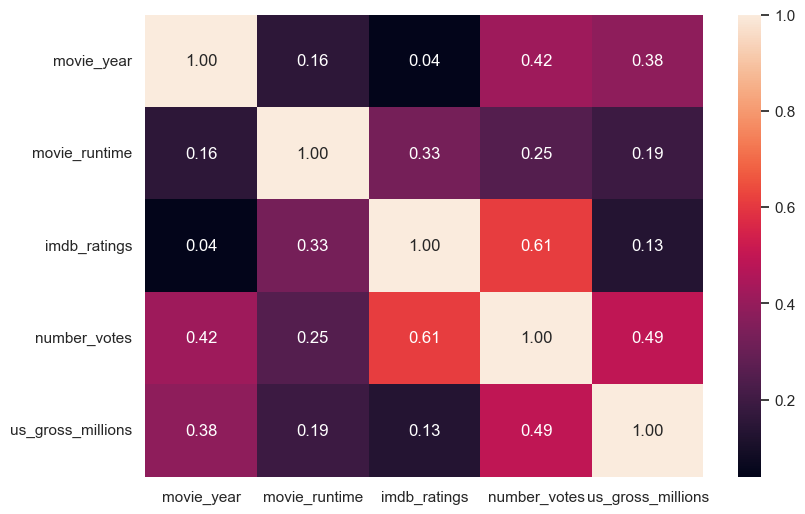

In [19]:
numeric_columns = movies.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(9, 6), dpi=100)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()
#

In [20]:
top_10_rated=movies.head(10)

In [21]:
top_10_rated

,movie_name,movie_year,movie_runtime,movie_gnere,imdb_ratings,number_votes,us_gross_millions
0,The Shawshank Redemption,1994,142,Drama,9.3,2804977,28.34
1,The Godfather,1972,175,"Crime, Drama",9.2,1954548,134.97
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,2786674,534.86
3,Schindler's List,1993,195,"Biography, Drama, History",9.0,1410143,96.90
4,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",9.0,1920256,377.85
5,12 Angry Men,1957,96,"Crime, Drama",9.0,834440,4.36
6,The Godfather Part II,1974,202,"Crime, Drama",9.0,1327320,57.30
7,Pulp Fiction,1994,154,"Crime, Drama",8.9,2151364,107.93
8,Fight Club,1999,139,Drama,8.8,2239223,37.03
9,The Lord of the Rings: The Fellowship of the Ring,2001,178,"Action, Adventure, Drama",8.8,1948468,315.54


In [22]:
top_10_rated_movie=top_10_rated[["movie_name","imdb_ratings"]]
print(top_10_rated_movie)

                                          movie_name  imdb_ratings
0                           The Shawshank Redemption           9.3
1                                      The Godfather           9.2
2                                    The Dark Knight           9.0
3                                   Schindler's List           9.0
4      The Lord of the Rings: The Return of the King           9.0
5                                       12 Angry Men           9.0
6                              The Godfather Part II           9.0
7                                       Pulp Fiction           8.9
8                                         Fight Club           8.8
9  The Lord of the Rings: The Fellowship of the Ring           8.8


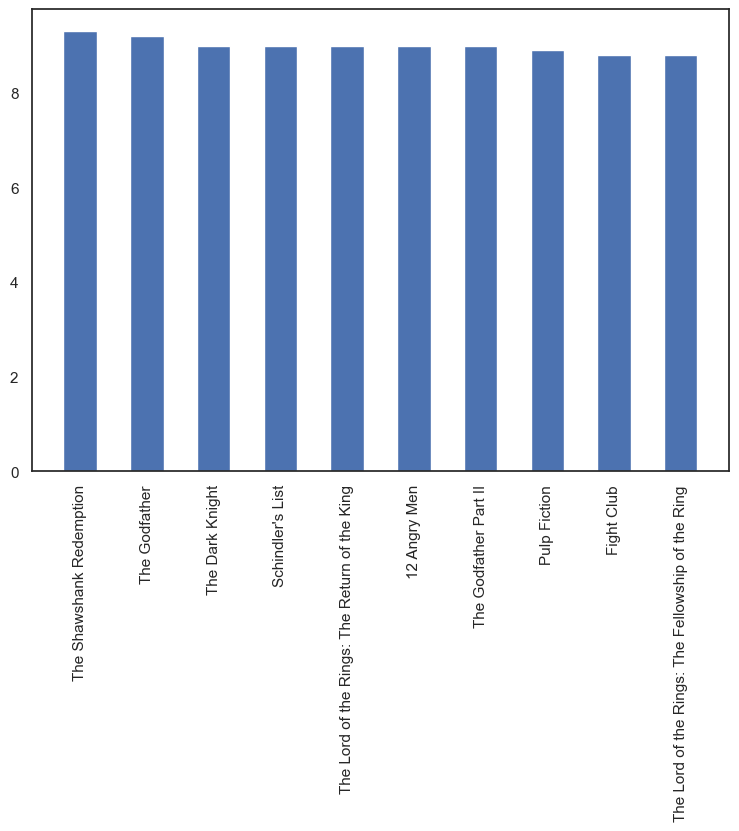

In [28]:

plt.figure(figsize=(9,6))
plt.bar(x=top_10_rated["movie_name"],height=top_10_rated["imdb_ratings"],width=0.5)
plt.xticks(rotation =90)
plt.show()


In [31]:
#df14['step_count'].replace({1: "1-1000", 2:"1001-3000", 3: "30001-5000",4:"Above5000"}, inplace=True)
movie_decades=movies[["movie_year","movie_runtime","us_gross_millions"]]

In [32]:
movie_decades

,movie_year,movie_runtime,us_gross_millions
0,1994,142,28.34
1,1972,175,134.97
2,2008,152,534.86
3,1993,195,96.90
4,2003,201,377.85
...,...,...,...
95,2010,103,415.00
96,1941,119,1.59
97,1962,218,44.82
98,1952,103,8.82


In [33]:
#f4.loc[(df4["step_count"] > 1000) & (df4["step_count"] <= 3000), "step_count"] = 2

movie_decades.loc[(movie_decades["movie_year"] > 1929) & (movie_decades["movie_year"] <= 1939),"movie_year" ] =1
movie_decades.loc[(movie_decades["movie_year"] > 1939) & (movie_decades["movie_year"] <= 1949),"movie_year" ] =2
movie_decades.loc[(movie_decades["movie_year"] > 1949) & (movie_decades["movie_year"] <= 1959),"movie_year" ] =3
movie_decades.loc[(movie_decades["movie_year"] > 1959) & (movie_decades["movie_year"] <= 1969),"movie_year" ] =4
movie_decades.loc[(movie_decades["movie_year"] > 1969) & (movie_decades["movie_year"] <= 1979),"movie_year" ] =5
movie_decades.loc[(movie_decades["movie_year"] > 1979) & (movie_decades["movie_year"] <= 1989),"movie_year" ] =6
movie_decades.loc[(movie_decades["movie_year"] > 1989) & (movie_decades["movie_year"] <= 1999),"movie_year" ] =7
movie_decades.loc[(movie_decades["movie_year"] > 1999) & (movie_decades["movie_year"] <= 2009),"movie_year" ] =8
movie_decades.loc[(movie_decades["movie_year"] > 2009) & (movie_decades["movie_year"] <= 2019),"movie_year" ] =9
movie_decades.loc[(movie_decades["movie_year"] > 2019) & (movie_decades["movie_year"] <= 2029),"movie_year" ] =10


In [102]:
movie_decades

,movie_year,movie_runtime,us_gross_millions
0,7,142,28.34
1,5,175,134.97
2,8,152,534.86
3,7,195,96.90
4,8,201,377.85
...,...,...,...
95,9,103,415.00
96,2,119,1.59
97,4,218,44.82
98,3,103,8.82


In [109]:
movie_decades["movie_year"].replace({1:"1930s",2:"1940s",3:"1950s",4:"1960s",5:"1970s",6:"1980s",7:"1990s",8:"2000s",9:"2010s",10:"2020s"},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\858076091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_decades["movie_year"].replace({1:"1930s",2:"1940s",3:"1950s",4:"1960s",5:"1970s",6:"1980s",7:"1990s",8:"2000s",9:"2010s",10:"2020s"},inplace=True)


In [111]:
movie_decades

,movie_year,movie_runtime,us_gross_millions
0,1990s,142,28.34
1,1970s,175,134.97
2,2000s,152,534.86
3,1990s,195,96.90
4,2000s,201,377.85
...,...,...,...
95,2010s,103,415.00
96,1940s,119,1.59
97,1960s,218,44.82
98,1950s,103,8.82


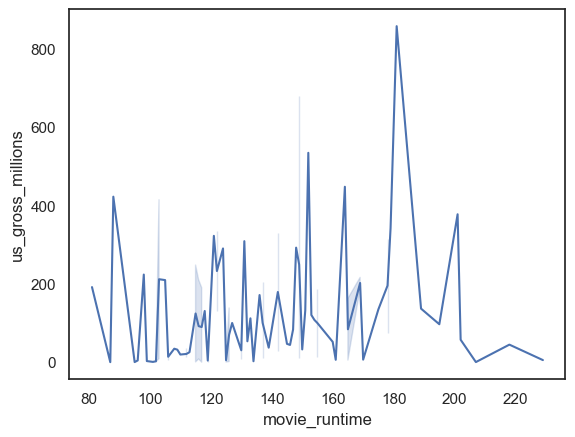

In [117]:
sns.lineplot(x="movie_runtime",y="us_gross_millions",data=movie_decades)
plt.show()

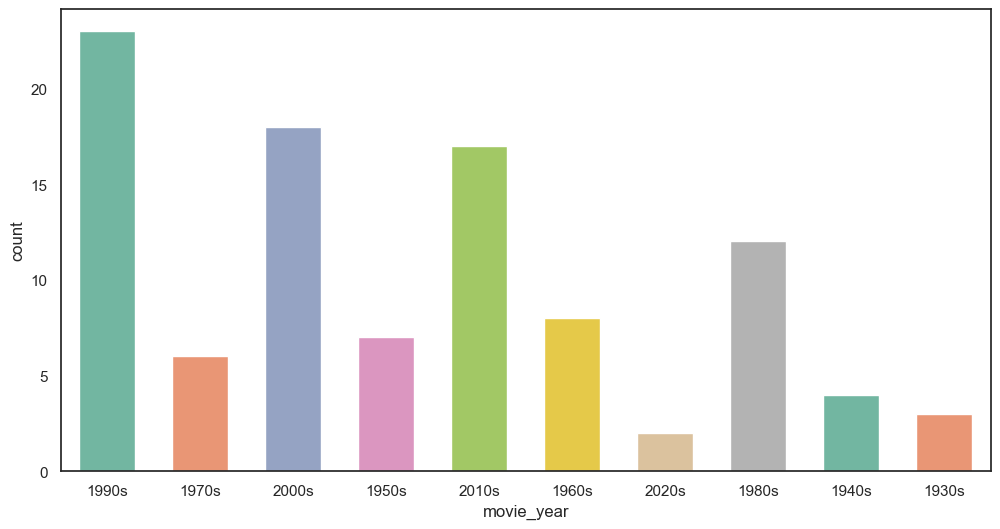

In [110]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(x =movie_decades['movie_year'], data = movie_decades,palette = "Set2",width=0.6)


plt.show()

In [103]:
movie_decades["movie_year"].unique()

array([ 7,  5,  8,  3,  9,  4, 10,  6,  2,  1])

In [104]:
value_counts=movie_decades["movie_year"].value_counts()
decade_counts=value_counts.sort_index(ascending=True)
decade_counts

movie_year
1      3
2      4
3      7
4      8
5      6
6     12
7     23
8     18
9     17
10     2
Name: count, dtype: int64

In [105]:
decade_counts=decade_counts.to_frame()

decade_counts

,count
movie_year,
1,3
2,4
3,7
4,8
5,6
6,12
7,23
8,18
9,17


In [106]:
decade_counts.reset_index(inplace=True)

decade_counts["movie_year"].replace({1:"1930s",2:"1940s",3:"1950s",4:"1960s",5:"1970s",6:"1980s",7:"1990s",8:"2000s",9:"2010s",10:"2020s"},inplace=True)
decade_counts

,movie_year,count
0,1930s,3
1,1940s,4
2,1950s,7
3,1960s,8
4,1970s,6
5,1980s,12
6,1990s,23
7,2000s,18
8,2010s,17
9,2020s,2


In [40]:
#df5=df4.groupby("step_count")["calories_burned"].mean()
movie_run_time_vs_decade=movie_decades.groupby("movie_year")["movie_runtime"].mean()

In [41]:
movie_run_time_vs_decade

movie_year
1      97.000000
2     119.000000
3     118.857143
4     146.625000
5     149.166667
6     141.083333
7     133.565217
8     140.722222
9     131.294118
10    160.000000
Name: movie_runtime, dtype: float64

In [42]:
movie_run_time_vs_decade=movie_run_time_vs_decade.to_frame()

movie_run_time_vs_decade

,movie_runtime
movie_year,
1,97.000000
2,119.000000
3,118.857143
4,146.625000
5,149.166667
6,141.083333
7,133.565217
8,140.722222
9,131.294118


In [43]:
movie_run_time_vs_decade.reset_index(inplace=True)
movie_run_time_vs_decade


,movie_year,movie_runtime
0,1,97.000000
1,2,119.000000
2,3,118.857143
3,4,146.625000
4,5,149.166667
5,6,141.083333
6,7,133.565217
7,8,140.722222
8,9,131.294118
9,10,160.000000


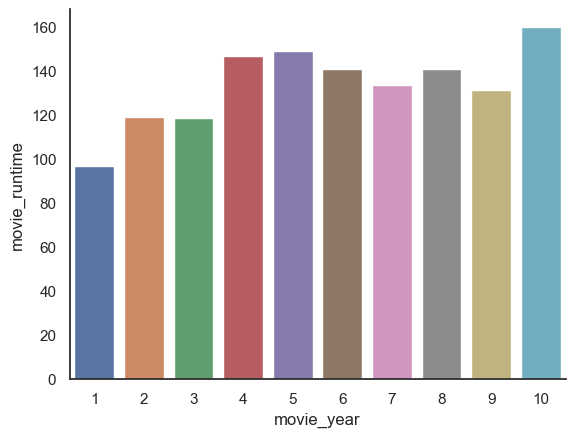

In [44]:
sns.barplot(x="movie_year",y="movie_runtime",data=movie_run_time_vs_decade)
sns.despine()

In [45]:
gross_vs_decade=movie_decades.groupby("movie_year")["us_gross_millions"].mean()

In [46]:
gross_vs_decade

movie_year
1       0.070000
2       0.966667
3      11.678000
4      24.245000
5     131.563333
6     126.833000
7     116.473913
8     134.479444
9     228.197059
10           NaN
Name: us_gross_millions, dtype: float64

In [47]:
gross_vs_decade=gross_vs_decade.to_frame()
gross_vs_decade



,us_gross_millions
movie_year,
1,0.070000
2,0.966667
3,11.678000
4,24.245000
5,131.563333
6,126.833000
7,116.473913
8,134.479444
9,228.197059


In [89]:
gross_vs_decade.reset_index(inplace=True)
gross_vs_decade["movie_year"].replace({1:"1930s",2:"1940s",3:"1950s",4:"1960s",5:"1970s",6:"1980s",7:"1990s",8:"2000s",9:"2010s",10:"2020s"},inplace=True)


In [90]:
gross_vs_decade

,level_0,index,movie_year,us_gross_millions
0,0,0,1930s,0.070000
1,1,1,1940s,0.966667
2,2,2,1950s,11.678000
3,3,3,1960s,24.245000
4,4,4,1970s,131.563333
5,5,5,1980s,126.833000
6,6,6,1990s,116.473913
7,7,7,2000s,134.479444
8,8,8,2010s,228.197059
9,9,9,2020s,NaN


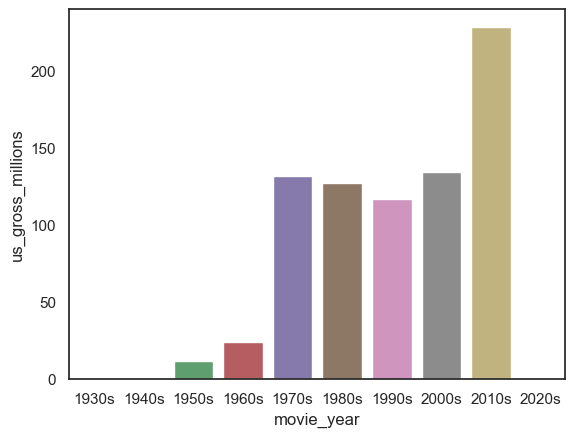

In [94]:
sns.barplot(x="movie_year",y="us_gross_millions",data=gross_vs_decade)
plt.show()

In [50]:
top_movie_genre=movies[["movie_gnere","imdb_ratings","movie_runtime","us_gross_millions"]]

In [51]:
top_movie_genre

,movie_gnere,imdb_ratings,movie_runtime,us_gross_millions
0,Drama,9.3,142,28.34
1,"Crime, Drama",9.2,175,134.97
2,"Action, Crime, Drama",9.0,152,534.86
3,"Biography, Drama, History",9.0,195,96.90
4,"Action, Adventure, Drama",9.0,201,377.85
...,...,...,...,...
95,"Animation, Adventure, Comedy",8.3,103,415.00
96,"Drama, Mystery",8.3,119,1.59
97,"Adventure, Biography, Drama",8.3,218,44.82
98,"Comedy, Musical, Romance",8.3,103,8.82


In [52]:
top_movie_genre["movie_gnere"].nunique()

56

In [53]:
movie_genre_vs_imdb_ratings=top_movie_genre.groupby("movie_gnere")["imdb_ratings"].mean().sort_values(ascending=False)

In [54]:
#since it is best it is closer to each other
(movie_genre_vs_imdb_ratings)

movie_gnere
Adventure, Western              8.800000
Crime, Drama                    8.785714
Action, Crime, Drama            8.750000
Biography, Crime, Drama         8.700000
Action, Adventure, Drama        8.700000
Adventure, Drama, Sci-Fi        8.700000
Action, Sci-Fi                  8.650000
Biography, Drama, History       8.633333
Crime, Drama, Fantasy           8.600000
Drama, Family, Fantasy          8.600000
Action, Drama                   8.600000
Drama                           8.585714
Drama, Romance                  8.533333
Action, Adventure, Sci-Fi       8.533333
Comedy, Drama, Romance          8.533333
Action, Adventure, Fantasy      8.533333
Crime, Drama, Thriller          8.500000
Biography, Comedy, Drama        8.500000
Drama, Romance, War             8.500000
Drama, Thriller                 8.500000
Western                         8.500000
Drama, Mystery, Sci-Fi          8.500000
Animation, Drama, War           8.500000
Drama, Western                  8.500000
Acti

In [55]:
movie_genre_vs_imdb_ratings=movie_genre_vs_imdb_ratings.to_frame()
movie_genre_vs_imdb_ratings

,imdb_ratings
movie_gnere,
"Adventure, Western",8.800000
"Crime, Drama",8.785714
"Action, Crime, Drama",8.750000
"Biography, Crime, Drama",8.700000
"Action, Adventure, Drama",8.700000
"Adventure, Drama, Sci-Fi",8.700000
"Action, Sci-Fi",8.650000
"Biography, Drama, History",8.633333
"Crime, Drama, Fantasy",8.600000


In [56]:
movie_genre_vs_imdb_ratings.reset_index(inplace=True)
movie_genre_vs_imdb_ratings

,movie_gnere,imdb_ratings
0,"Adventure, Western",8.800000
1,"Crime, Drama",8.785714
2,"Action, Crime, Drama",8.750000
3,"Biography, Crime, Drama",8.700000
4,"Action, Adventure, Drama",8.700000
5,"Adventure, Drama, Sci-Fi",8.700000
6,"Action, Sci-Fi",8.650000
7,"Biography, Drama, History",8.633333
8,"Crime, Drama, Fantasy",8.600000
9,"Drama, Family, Fantasy",8.600000


In [80]:
top_10_movie_genre_vs_imdb_ratings=movie_genre_vs_imdb_ratings.head(10)

In [81]:
top_10_movie_genre_vs_imdb_ratings

,movie_gnere,imdb_ratings
0,"Adventure, Western",8.800000
1,"Crime, Drama",8.785714
2,"Action, Crime, Drama",8.750000
3,"Biography, Crime, Drama",8.700000
4,"Action, Adventure, Drama",8.700000
5,"Adventure, Drama, Sci-Fi",8.700000
6,"Action, Sci-Fi",8.650000
7,"Biography, Drama, History",8.633333
8,"Crime, Drama, Fantasy",8.600000
9,"Drama, Family, Fantasy",8.600000


<Axes: xlabel='imdb_ratings', ylabel='movie_gnere'>

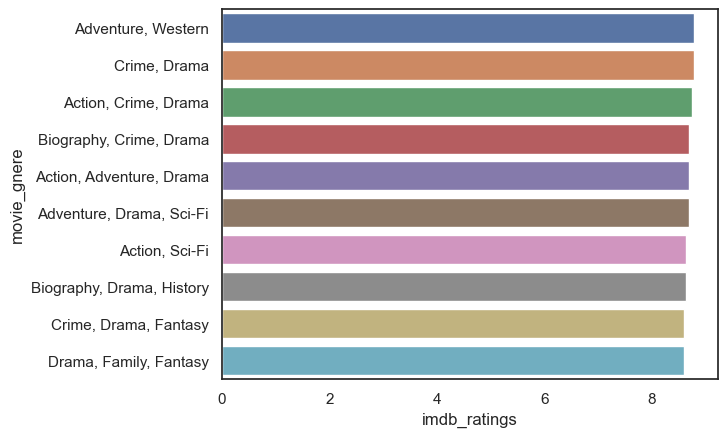

In [83]:
sns.barplot(y="movie_gnere",x="imdb_ratings",data=top_10_movie_genre_vs_imdb_ratings)

In [58]:
movie_genre_vs_movie_runtime=top_movie_genre.groupby("movie_gnere")["movie_runtime"].mean().sort_values(ascending=False)

In [59]:
(movie_genre_vs_movie_runtime)

movie_gnere
Adventure, Biography, Drama     218.000000
Action, Drama                   207.000000
Crime, Drama, Fantasy           189.000000
Biography, Drama, History       184.333333
Action, Adventure, Drama        178.800000
Comedy, Drama                   170.000000
Adventure, Drama, Sci-Fi        169.000000
Drama, Western                  165.000000
Western                         165.000000
Action, Drama, Thriller         164.000000
Adventure, Western              161.000000
Crime, Drama                    157.857143
Biography, Drama, Music         155.000000
Adventure, Drama, War           153.000000
Adventure, Sci-Fi               149.000000
Drama, Mystery, War             147.000000
Drama, Horror                   146.000000
Biography, Crime, Drama         145.000000
Action, Adventure, Sci-Fi       144.666667
Drama, Thriller, War            142.000000
Drama, Romance                  141.000000
Drama, Mystery, Thriller        137.000000
Action, Sci-Fi                  136.500000

In [60]:
movie_genre_vs_movie_runtime=movie_genre_vs_movie_runtime.to_frame()
movie_genre_vs_movie_runtime


,movie_runtime
movie_gnere,
"Adventure, Biography, Drama",218.000000
"Action, Drama",207.000000
"Crime, Drama, Fantasy",189.000000
"Biography, Drama, History",184.333333
"Action, Adventure, Drama",178.800000
"Comedy, Drama",170.000000
"Adventure, Drama, Sci-Fi",169.000000
"Drama, Western",165.000000
Western,165.000000


In [61]:
movie_genre_vs_movie_runtime.reset_index(inplace=True)
movie_genre_vs_movie_runtime

,movie_gnere,movie_runtime
0,"Adventure, Biography, Drama",218.000000
1,"Action, Drama",207.000000
2,"Crime, Drama, Fantasy",189.000000
3,"Biography, Drama, History",184.333333
4,"Action, Adventure, Drama",178.800000
5,"Comedy, Drama",170.000000
6,"Adventure, Drama, Sci-Fi",169.000000
7,"Drama, Western",165.000000
8,Western,165.000000
9,"Action, Drama, Thriller",164.000000


In [72]:
top_10_movie_genre_vs_movie_runtime=movie_genre_vs_movie_runtime.head(10)

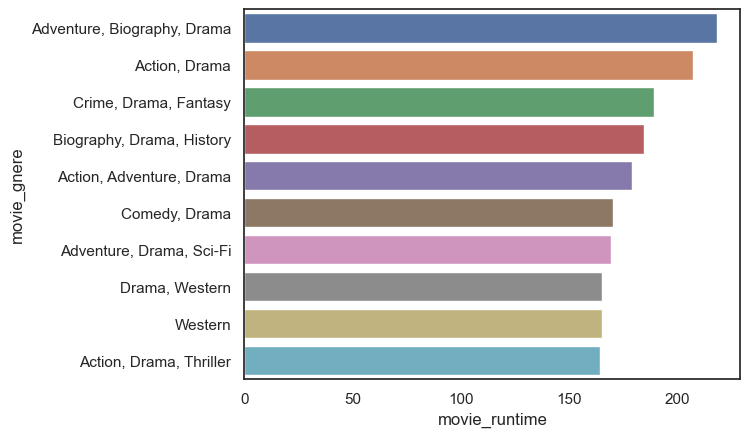

In [78]:
sns.barplot(x="movie_runtime",y="movie_gnere",data=top_10_movie_genre_vs_movie_runtime)

plt.show()

In [63]:
movie_genre_vs_us_gross_millions=top_movie_genre.groupby("movie_gnere")["us_gross_millions"].mean().sort_values(ascending=False)

In [64]:
#df=df.to_frame()
movie_genre_vs_us_gross_millions=movie_genre_vs_us_gross_millions.to_frame()
movie_genre_vs_us_gross_millions


,us_gross_millions
movie_gnere,
"Action, Drama, Thriller",448.140000
"Action, Adventure, Drama",416.404000
"Action, Adventure, Sci-Fi",352.186667
"Animation, Adventure, Drama",316.255000
"Action, Adventure, Fantasy",307.450000
"Animation, Adventure, Comedy",303.400000
"Action, Crime, Drama",277.180000
"Action, Adventure",248.160000
"Adventure, Comedy, Sci-Fi",210.610000


In [65]:
movie_genre_vs_us_gross_millions.reset_index(inplace=True)

In [66]:
movie_genre_vs_us_gross_millions

,movie_gnere,us_gross_millions
0,"Action, Drama, Thriller",448.140000
1,"Action, Adventure, Drama",416.404000
2,"Action, Adventure, Sci-Fi",352.186667
3,"Animation, Adventure, Drama",316.255000
4,"Action, Adventure, Fantasy",307.450000
5,"Animation, Adventure, Comedy",303.400000
6,"Action, Crime, Drama",277.180000
7,"Action, Adventure",248.160000
8,"Adventure, Comedy, Sci-Fi",210.610000
9,"Crime, Drama, Thriller",199.523333


In [69]:
top_10_movie_genre_vs_us_gross_millions=movie_genre_vs_us_gross_millions.head(10)
top_10_movie_genre_vs_us_gross_millions

,movie_gnere,us_gross_millions
0,"Action, Drama, Thriller",448.140000
1,"Action, Adventure, Drama",416.404000
2,"Action, Adventure, Sci-Fi",352.186667
3,"Animation, Adventure, Drama",316.255000
4,"Action, Adventure, Fantasy",307.450000
5,"Animation, Adventure, Comedy",303.400000
6,"Action, Crime, Drama",277.180000
7,"Action, Adventure",248.160000
8,"Adventure, Comedy, Sci-Fi",210.610000
9,"Crime, Drama, Thriller",199.523333


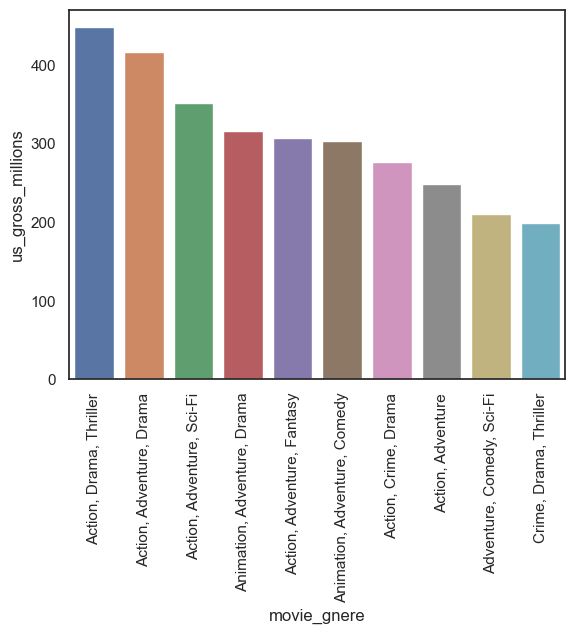

In [71]:

sns.barplot(x="movie_gnere",y="us_gross_millions",data=top_10_movie_genre_vs_us_gross_millions)
plt.xticks(rotation=90)
plt.show()